In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2S # prot err
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

2025-10-21 05:35:58.205589: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-21 05:35:58.205819: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-21 05:35:58.233285: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-21 05:35:58.807562: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation or

In [2]:
IMG_SIZE = (300, 300)
BATCH = 24
NUM_CLASSES = 12

train_data_gener = ImageDataGenerator(rescale = 1./255, rotation_range = 20, 
                                width_shift_range = 0.1, height_shift_range = 0.1,
                                zoom_range = 0.2, brightness_range = [0.5, 2],
                                shear_range = 0.2, horizontal_flip = True)
test_data_gener = ImageDataGenerator(rescale = 1./255)
train_data = train_data_gener.flow_from_directory('train', target_size = IMG_SIZE, 
                                                  batch_size = BATCH, class_mode = 'categorical',
                                                  shuffle = True)
test_data = test_data_gener.flow_from_directory('test', target_size = IMG_SIZE, 
                                                  batch_size = BATCH, class_mode = 'categorical',
                                                  shuffle = True)

base_model = EfficientNetV2S(weights='imagenet', include_top=False, input_shape=(*IMG_SIZE,3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(train_data, validation_data=test_data, epochs=200)

test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

Found 4395 images belonging to 12 classes.
Found 1099 images belonging to 12 classes.


E0000 00:00:1761039380.614795  107090 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1761039380.624025  107090 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/nicholaswk/Pest_ID/efficientnet_env/lib/python3.13/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_calle

Epoch 1/200
184/184 ━━━━━━━━━━━━━━━━━━━━ 99s 499ms/step - accuracy: 0.1122 - loss: 2.4575 - val_accuracy: 0.1237 - val_loss: 2.4245
Epoch 2/200
184/184 ━━━━━━━━━━━━━━━━━━━━ 88s 479ms/step - accuracy: 0.1363 - loss: 2.4168 - val_accuracy: 0.1729 - val_loss: 2.4022
Epoch 3/200
184/184 ━━━━━━━━━━━━━━━━━━━━ 89s 480ms/step - accuracy: 0.1666 - loss: 2.3949 - val_accuracy: 0.2075 - val_loss: 2.3791
Epoch 4/200
184/184 ━━━━━━━━━━━━━━━━━━━━ 88s 478ms/step - accuracy: 0.1754 - loss: 2.3760 - val_accuracy: 0.1811 - val_loss: 2.3641
Epoch 5/200
184/184 ━━━━━━━━━━━━━━━━━━━━ 87s 471ms/step - accuracy: 0.1832 - loss: 2.3610 - val_accuracy: 0.1847 - val_loss: 2.3410
Epoch 6/200
184/184 ━━━━━━━━━━━━━━━━━━━━ 87s 471ms/step - accuracy: 0.1836 - loss: 2.3530 - val_accuracy: 0.2266 - val_loss: 2.3271
Epoch 7/200
184/184 ━━━━━━━━━━━━━━━━━━━━ 87s 471ms/step - accuracy: 0.1948 - loss: 2.3422 - val_accuracy: 0.2129 - val_loss: 2.3114
Epoch 8/200
184/184 ━━━━━━━━━━━━━━━━━━━━ 92s 501ms/step - accuracy: 0.1950 -

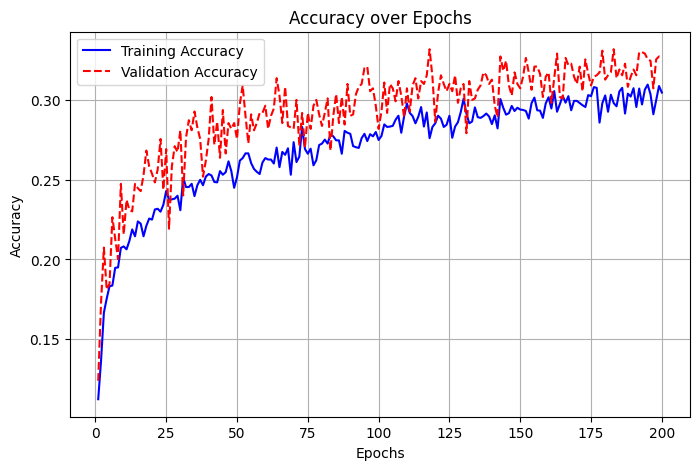

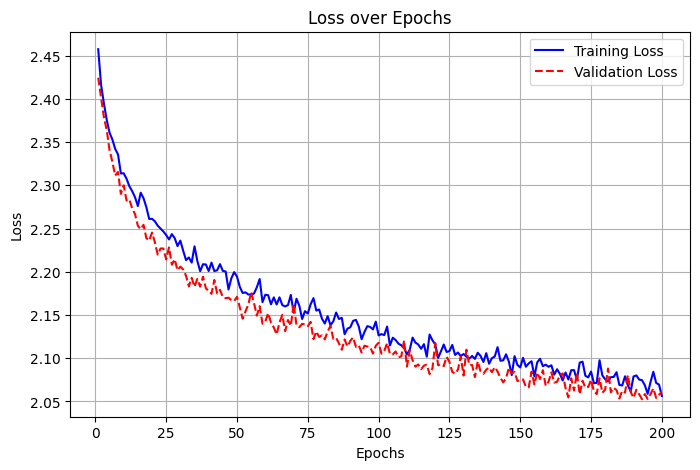

In [3]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8,5))
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

46/46 ━━━━━━━━━━━━━━━━━━━━ 20s 396ms/step


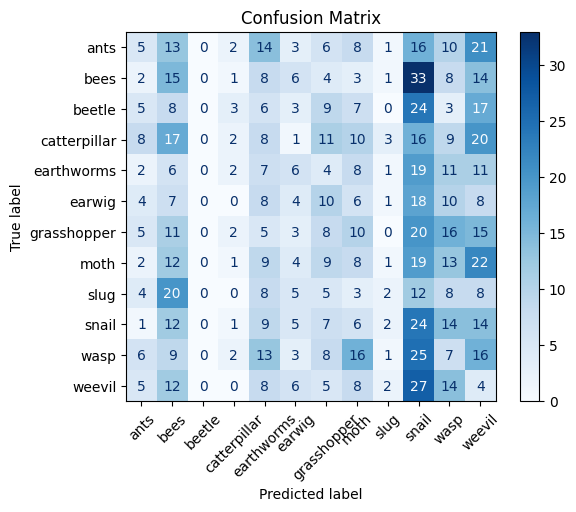

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true = test_data.classes
y_pred = np.argmax(model.predict(test_data), axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_data.class_indices.keys()))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


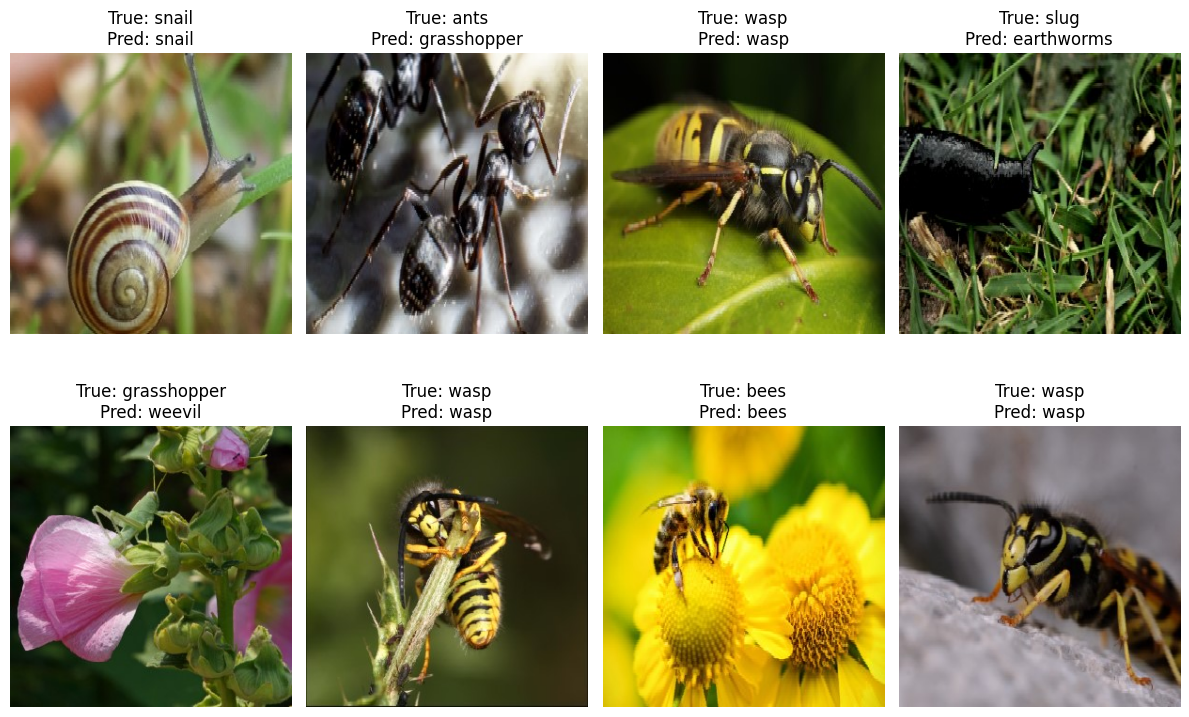

In [8]:
import matplotlib.pyplot as plt

test_data.reset()
images, labels = next(test_data)

preds = model.predict(images)
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(labels, axis=1)
class_names = list(test_data.class_indices.keys())

plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i])
    plt.title(f"True: {class_names[true_classes[i]]}\nPred: {class_names[pred_classes[i]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()
